# ranger

## Description

Ranger is a fast implementation of random forests (Breiman 2001) or recursive partitioning, particularly suited for high dimensional data. Classification, regression, and survival forests are supported. Classification and regression forests are implemented as in the original Random Forest (Breiman 2001), survival forests as in Random Survival Forests (Ishwaran et al. 2008). Includes implementations of extremely randomized trees (Geurts et al. 2006) and quantile regression forests (Meinshausen 2006).

## Usage

```
ranger(
  formula = NULL,
  data = NULL,
  num.trees = 500,
  mtry = NULL,
  importance = "none",
  write.forest = TRUE,
  probability = FALSE,
  min.node.size = NULL,
  max.depth = NULL,
  replace = TRUE,
  sample.fraction = ifelse(replace, 1, 0.632),
  case.weights = NULL,
  class.weights = NULL,
  splitrule = NULL,
  num.random.splits = 1,
  alpha = 0.5,
  minprop = 0.1,
  split.select.weights = NULL,
  always.split.variables = NULL,
  respect.unordered.factors = NULL,
  scale.permutation.importance = FALSE,
  local.importance = FALSE,
  regularization.factor = 1,
  regularization.usedepth = FALSE,
  keep.inbag = FALSE,
  inbag = NULL,
  holdout = FALSE,
  quantreg = FALSE,
  oob.error = TRUE,
  num.threads = NULL,
  save.memory = FALSE,
  verbose = TRUE,
  seed = NULL,
  dependent.variable.name = NULL,
  status.variable.name = NULL,
  classification = NULL,
  x = NULL,
  y = NULL,
  ...
)
```

## Arguments

formula

Object of class `formula` or `character` describing the model to fit. Interaction terms supported only for numerical variables.

data

Training data of class `data.frame`, `matrix`, `dgCMatrix` (Matrix) or `gwaa.data` (GenABEL).

num.trees

Number of trees.

mtry

Number of variables to possibly split at in each node. Default is the (rounded down) square root of the number variables. Alternatively, a single arfument function returning an integer, given the number of independent variables.

importance

Variable importance mode, one of 'none', 'impurity', 'impurity_corrected', 'permutation'. The 'impurity' measure is the Gini index for classification, the variance of the responses for regression and the sum of test statistics (see `splitrule`) for survival.

write.forest

Save `ranger.forest` object, required for prediction. Set to `FALSE` to reduce memory usage if no prediction intended.

probability

Grow a probability forest as in Malley et al. (2012).

min.node.size

Minimal node size. Default 1 for classification, 5 for regression, 3 for survival, and 10 for probability.

max.depth

Maximal tree depth. A value of NULL or 0 (the default) corresponds to unlimited depth, 1 to tree stumps (1 split per tree).

replace

Sample with replacement.

sample.fraction

Fraction of observations to sample. Default is 1 for sampling with replacement and 0.632 for sampling without replacement. For classification, this can be a vector of class-specific values.

case.weights

Weights for sampling of training observations. Observations with larfer weights will be selected with higher probability in the bootstrap (or subsampled) samples for the trees.

class.weights

Weights for the outcome classes (in order of the factor levels) in the splitting rule (cost sensitive learning). Classification and probability prediction only. For classification the weights are also applied in the majority vote in terminal nodes.

splitrule

Splitting rule. For classification and probability estimation "gini", "extratrees" or "hellinger" with default "gini". For regression "variance", "extratrees", "maxstat" or "beta" with default "variance". For survival "logrank", "extratrees", "C" or "maxstat" with default "logrank".

num.random.splits

For "extratrees" splitrule.: Number of random splits to consider for each candidate splitting variable.

alpha

For "maxstat" splitrule: Significance threshold to allow splitting.

minprop

For "maxstat" splitrule: Lower quantile of covariate distribution to be considered for splitting.

split.select.weights

Numeric vector with weights between 0 and 1, used to calculate the probability to select variables for splitting. Alternatively, a list of size num.trees, containing split select weight vectors for each tree can be used.

always.split.variables

Character vector with variable names to be always selected in addition to the `mtry` variables tried for splitting.

respect.unordered.factors

Handling of unordered factor covariates. One of 'ignore', 'order' and 'partition'. For the "extratrees" splitrule the default is "partition" for all other splitrules 'ignore'. Alternatively TRUE (='order') or FALSE (='ignore') can be used. See below for details.

scale.permutation.importance

Scale permutation importance by standard error as in (Breiman 2001). Only applicable if permutation variable importance mode selected.

local.importance

Calculate and return local importance values as in (Breiman 2001). Only applicable if `importance` is set to 'permutation'.

regularization.factor

Regularization factor (gain penalization), either a vector of length p or one value for all variables.

regularization.usedepth

Consider the depth in regularization.

keep.inbag

Save how often observations are in-bag in each tree.

inbag

Manually set observations per tree. List of size num.trees, containing inbag counts for each observation. Can be used for stratified sampling.

holdout

Hold-out mode. Hold-out all samples with case weight 0 and use these for variable importance and prediction error.

quantreg

Prepare quantile prediction as in quantile regression forests (Meinshausen 2006). Regression only. Set `keep.inbag = TRUE` to prepare out-of-bag quantile prediction.

oob.error

Compute OOB prediction error. Set to `FALSE` to save computation time, e.g. for larfe survival forests.

num.threads

Number of threads. Default is number of CPUs available.

save.memory

Use memory saving (but slower) splitting mode. No effect for survival and GWAS data. Warning: This option slows down the tree growing, use only if you encounter memory problems.

verbose

Show computation status and estimated runtime.

seed

Random seed. Default is `NULL`, which generates the seed from `R`. Set to `0` to ignore the `R` seed.

dependent.variable.name

Name of dependent variable, needed if no formula given. For survival forests this is the time variable.

status.variable.name

Name of status variable, only applicable to survival data and needed if no formula given. Use 1 for event and 0 for censoring.

classification

Set to `TRUE` to grow a classification forest. Only needed if the data is a matrix or the response numeric.

x

Predictor data (independent variables), alternative interface to data with formula or dependent.variable.name.

y

Response vector (dependent variable), alternative interface to data with formula or dependent.variable.name. For survival use a `Surv()` object or a matrix with time and status.

...

Further arfuments passed to or from other methods (currently ignored).

## Value

Object of class `ranger` with elements

```
forest
```

Saved forest (If write.forest set to TRUE). Note that the variable IDs in the `split.varIDs` object do not necessarily represent the column number in R.

 

```
predictions
```

Predicted classes/values, based on out of bag samples (classification and regression only).

 

```
variable.importance
```

Variable importance for each independent variable.

 

```
variable.importance.local
```

Variable importance for each independent variable and each sample, if `local.importance` is set to TRUE and `importance` is set to 'permutation'.

 

```
prediction.error
```

Overall out of bag prediction error. For classification this is the fraction of missclassified samples, for probability estimation the Brier score, for regression the mean squared error and for survival one minus Harrell's C-index.

 

```
r.squared
```

R squared. Also called explained variance or coefficient of determination (regression only). Computed on out of bag data.

 

```
confusion.matrix
```

Contingency table for classes and predictions based on out of bag samples (classification only).

 

```
unique.death.times
```

Unique death times (survival only).

 

```
chf
```

Estimated cumulative hazard function for each sample (survival only).

 

```
survival
```

Estimated survival function for each sample (survival only).

 

```
call
```

Function call.

 

```
num.trees
```

Number of trees.

 

```
num.independent.variables
```

Number of independent variables.

 

```
mtry
```

Value of mtry used.

 

```
min.node.size
```

Value of minimal node size used.

 

```
treetype
```

Type of forest/tree. classification, regression or survival.

 

```
importance.mode
```

Importance mode used.

 

```
num.samples
```

Number of samples.

 

```
inbag.counts
```

Number of times the observations are in-bag in the trees.

## Details

The tree type is determined by the type of the dependent variable. For factors classification trees are grown, for numeric values regression trees and for survival objects survival trees. The Gini index is used as default splitting rule for classification. For regression, the estimated response variances or maximally selected rank statistics (Wright et al. 2016) can be used. For Survival the log-rank test, a C-index based splitting rule (Schmid et al. 2015) and maximally selected rank statistics (Wright et al. 2016) are available. For all tree types, forests of extremely randomized trees (Geurts et al. 2006) can be grown.

With the `probability` option and factor dependent variable a probability forest is grown. Here, the node impurity is used for splitting, as in classification forests. Predictions are class probabilities for each sample. In contrast to other implementations, each tree returns a probability estimate and these estimates are averaged for the forest probability estimate. For details see Malley et al. (2012).

Note that for classification and regression nodes with size smaller than `min.node.size` can occur, as in original Random Forests. For survival all nodes contain at `min.node.size` samples. Variables selected with `always.split.variables` are tried additionally to the mtry variables randomly selected. In `split.select.weights`, weights do not need to sum up to 1, they will be normalized later. The weights are assigned to the variables in the order they appear in the formula or in the data if no formula is used. Names of the `split.select.weights` vector are ignored. Weights assigned by `split.select.weights` to variables in `always.split.variables` are ignored. The usage of `split.select.weights` can increase the computation times for larfe forests.

Unordered factor covariates can be handled in 3 different ways by using `respect.unordered.factors`: For 'ignore' all factors are regarded ordered, for 'partition' all possible 2-partitions are considered for splitting. For 'order' and 2-class classification the factor levels are ordered by their proportion falling in the second class, for regression by their mean response, as described in Hastie et al. (2009), chapter 9.2.4. For multiclass classification the factor levels are ordered by the first principal component of the weighted covariance matrix of the contingency table (Coppersmith et al. 1999), for survival by the median survival (or the larfest available quantile if the median is not available). The use of 'order' is recommended, as it computationally fast and can handle an unlimited number of factor levels. Note that the factors are only reordered once and not again in each split.

The 'impurity_corrected' importance measure is unbiased in terms of the number of categories and category frequencies and is almost as fast as the standard impurity importance. It is a modified version of the method by Sandri & Zuccolotto (2008), which is faster and more memory efficient. See Nembrini et al. (2018) for details. This importance measure can be combined with the methods to estimate p-values in `importance_pvalues`.

Regularization works by penalizing new variables by multiplying the splitting criterion by a factor, see Deng & Runger (2012) for details. If `regularization.usedepth=TRUE`, fd is used, where *f* is the regularization factor and *d* the depth of the node. If regularization is used, multithreading is deactivated because all trees need access to the list of variables that are already included in the model.

For a larfe number of variables and data frames as input data the formula interface can be slow or impossible to use. Alternatively `dependent.variable.name` (and `status.variable.name` for survival) or `x` and `y` can be used. Use `x` and `y` with a matrix for `x` to avoid conversions and save memory. Consider setting `save.memory = TRUE` if you encounter memory problems for very larfe datasets, but be aware that this option slows down the tree growing.

For GWAS data consider combining `ranger` with the `GenABEL` package. See the Examples section below for a demonstration using `Plink` data. All SNPs in the `GenABEL` object will be used for splitting. To use only the SNPs without sex or other covariates from the phenotype file, use `0` on the right hand side of the formula. Note that missing values are treated as an extra category while splitting.

See https://github.com/imbs-hl/ranger for the development version.

With recent R versions, multithreading on Windows platforms should just work. If you compile yourself, the new RTools toolchain is required.

## References

- Wright, M. N. & Ziegler, A. (2017). ranger: A fast implementation of random forests for high dimensional data in C++ and R. J Stat Softw 77:1-17. 10.18637/jss.v077.i01.
- Schmid, M., Wright, M. N. & Ziegler, A. (2016). On the use of Harrell's C for clinical risk prediction via random survival forests. Expert Syst Appl 63:450-459. 10.1016/j.eswa.2016.07.018.
- Wright, M. N., Dankowski, T. & Ziegler, A. (2017). Unbiased split variable selection for random survival forests using maximally selected rank statistics. Stat Med 36:1272-1284. 10.1002/sim.7212.
- Nembrini, S., Koenig, I. R. & Wright, M. N. (2018). The revival of the Gini Importance? Bioinformatics. 10.1093/bioinformatics/bty373.
- Breiman, L. (2001). Random forests. Mach Learn, 45:5-32. 10.1023/A:1010933404324.
- Ishwaran, H., Kogalur, U. B., Blackstone, E. H., & Lauer, M. S. (2008). Random survival forests. Ann Appl Stat 2:841-860. 10.1097/JTO.0b013e318233d835.
- Malley, J. D., Kruppa, J., Dasgupta, A., Malley, K. G., & Ziegler, A. (2012). Probability machines: consistent probability estimation using nonparametric learning machines. Methods Inf Med 51:74-81. 10.3414/ME00-01-0052.
- Hastie, T., Tibshirani, R., Friedman, J. (2009). The Elements of Statistical Learning. Springer, New York. 2nd edition.
- Geurts, P., Ernst, D., Wehenkel, L. (2006). Extremely randomized trees. Mach Learn 63:3-42. 10.1007/s10994-006-6226-1.
- Meinshausen (2006). Quantile Regression Forests. J Mach Learn Res 7:983-999. https://www.jmlr.orf/papers/v7/meinshausen06a.html.
- Sandri, M. & Zuccolotto, P. (2008). A bias correction algorithm for the Gini variable importance measure in classification trees. J Comput Graph Stat, 17:611-628. 10.1198/106186008X344522.
- Coppersmith D., Hong S. J., Hosking J. R. (1999). Partitioning nominal attributes in decision trees. Data Min Knowl Discov 3:197-217. 10.1023/A:1009869804967.
- Deng & Runger (2012). Feature selection via regularized trees. The 2012 International Joint Conference on Neural Networks (IJCNN), Brisbane, Australia. 10.1109/IJCNN.2012.6252640.

## See Also

```
predict.ranger
```

## Examples

In [1]:
options(warn=-1)    #忽略一切警告
options('width'=140)  #充分利用打印宽度
options(repr.plot.width=15, repr.plot.height=10)  #满幅
library(randomForest)
library(ranger)

ames <- as.data.frame(AmesHousing::make_ames())
#skim(ames)

ames_c <- ames
ames_c[, "Sale_Price"] <- factor(ames_c[, "Sale_Price"] > 160000)
#skim(ames_c)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




### 速度比测

In [2]:
system.time(rf <- ranger(Sale_Price ~ ., data = ames_c)) 
system.time(rf <- randomForest(Sale_Price ~ ., data = ames_c)) 

   user  system elapsed 
   1.39    0.03    0.17 

   user  system elapsed 
   4.67    0.00    4.67 

可见：与randomForest相比，ranger优势明显

### 参数-importance

In [3]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, seed = 111))  #默认importance="none"--不做importance评测
importance(rf)

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

ERROR: Error in importance.ranger(rf): No variable importance found. Please use 'importance' option when growing the forest.


Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, importance = "impurity",      seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

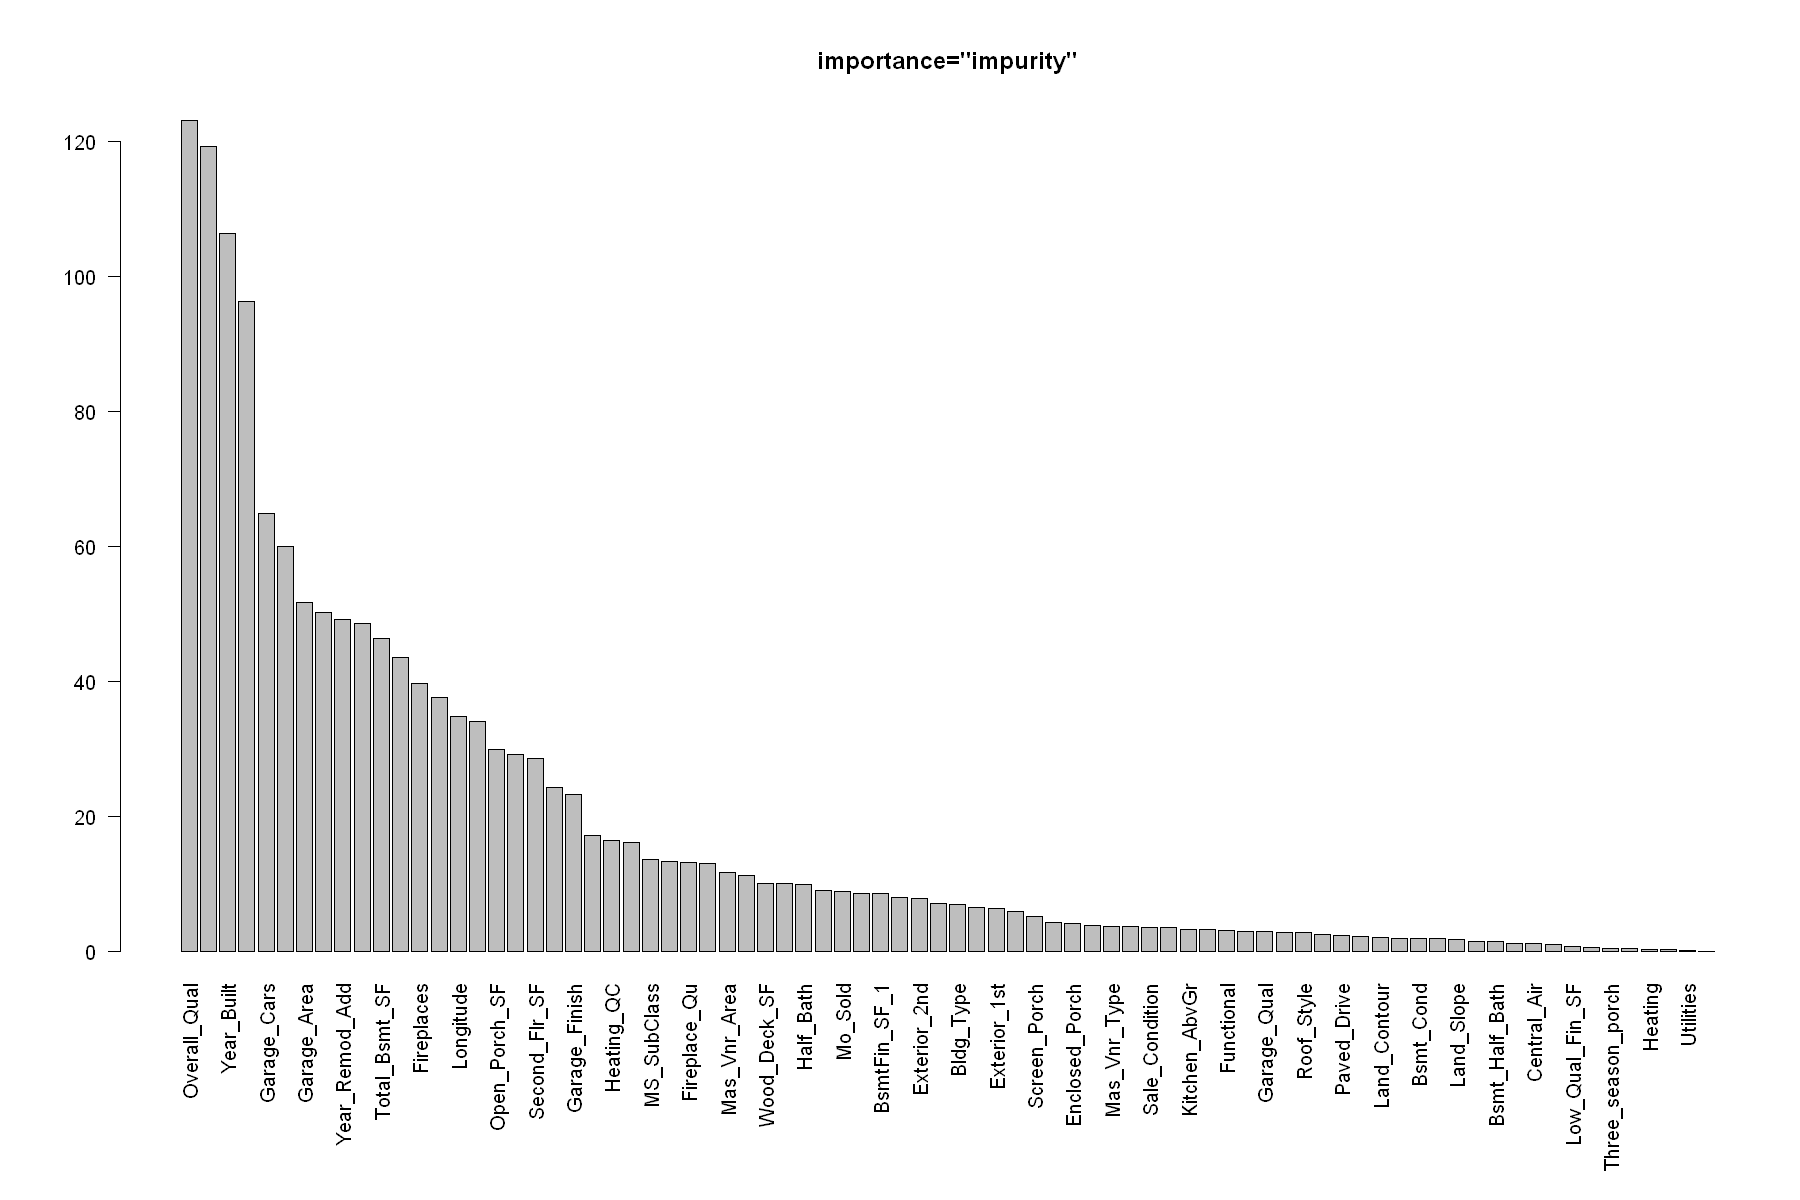

In [4]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, importance="impurity", seed = 111))
par(mar = c(10,5,5,1))
barplot(sort(importance(rf),decreasing = TRUE), las = 2, main = 'importance="impurity"')

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, importance = "impurity_corrected",      seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         impurity_corrected 
Splitrule:                        gini 
OOB prediction error:             7.20 % 

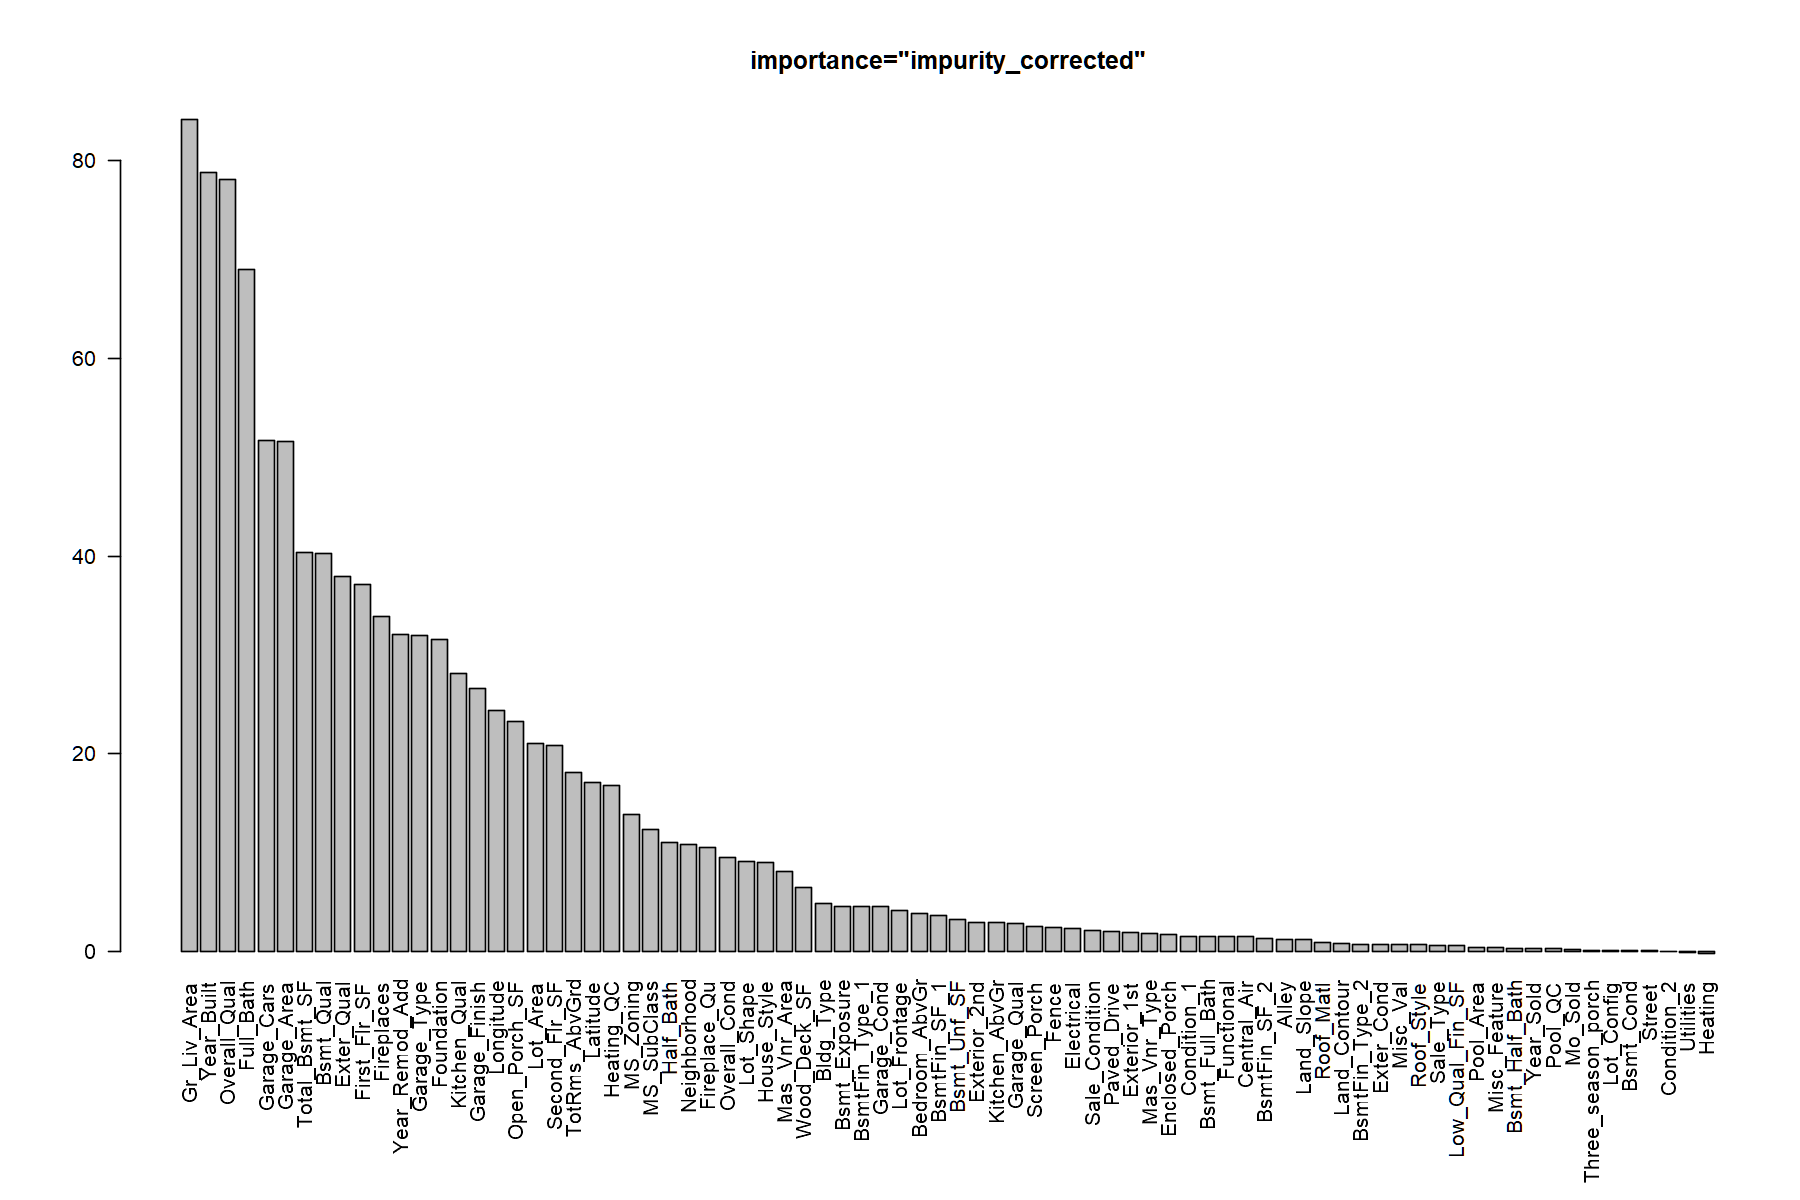

In [22]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, importance="impurity_corrected", seed = 111))
par(mar = c(10,5,5,1))
barplot(sort(importance(rf),decreasing = TRUE), las = 2, main = 'importance="impurity_corrected"')

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, importance = "permutation") 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         permutation 
Splitrule:                        gini 
OOB prediction error:             6.86 % 

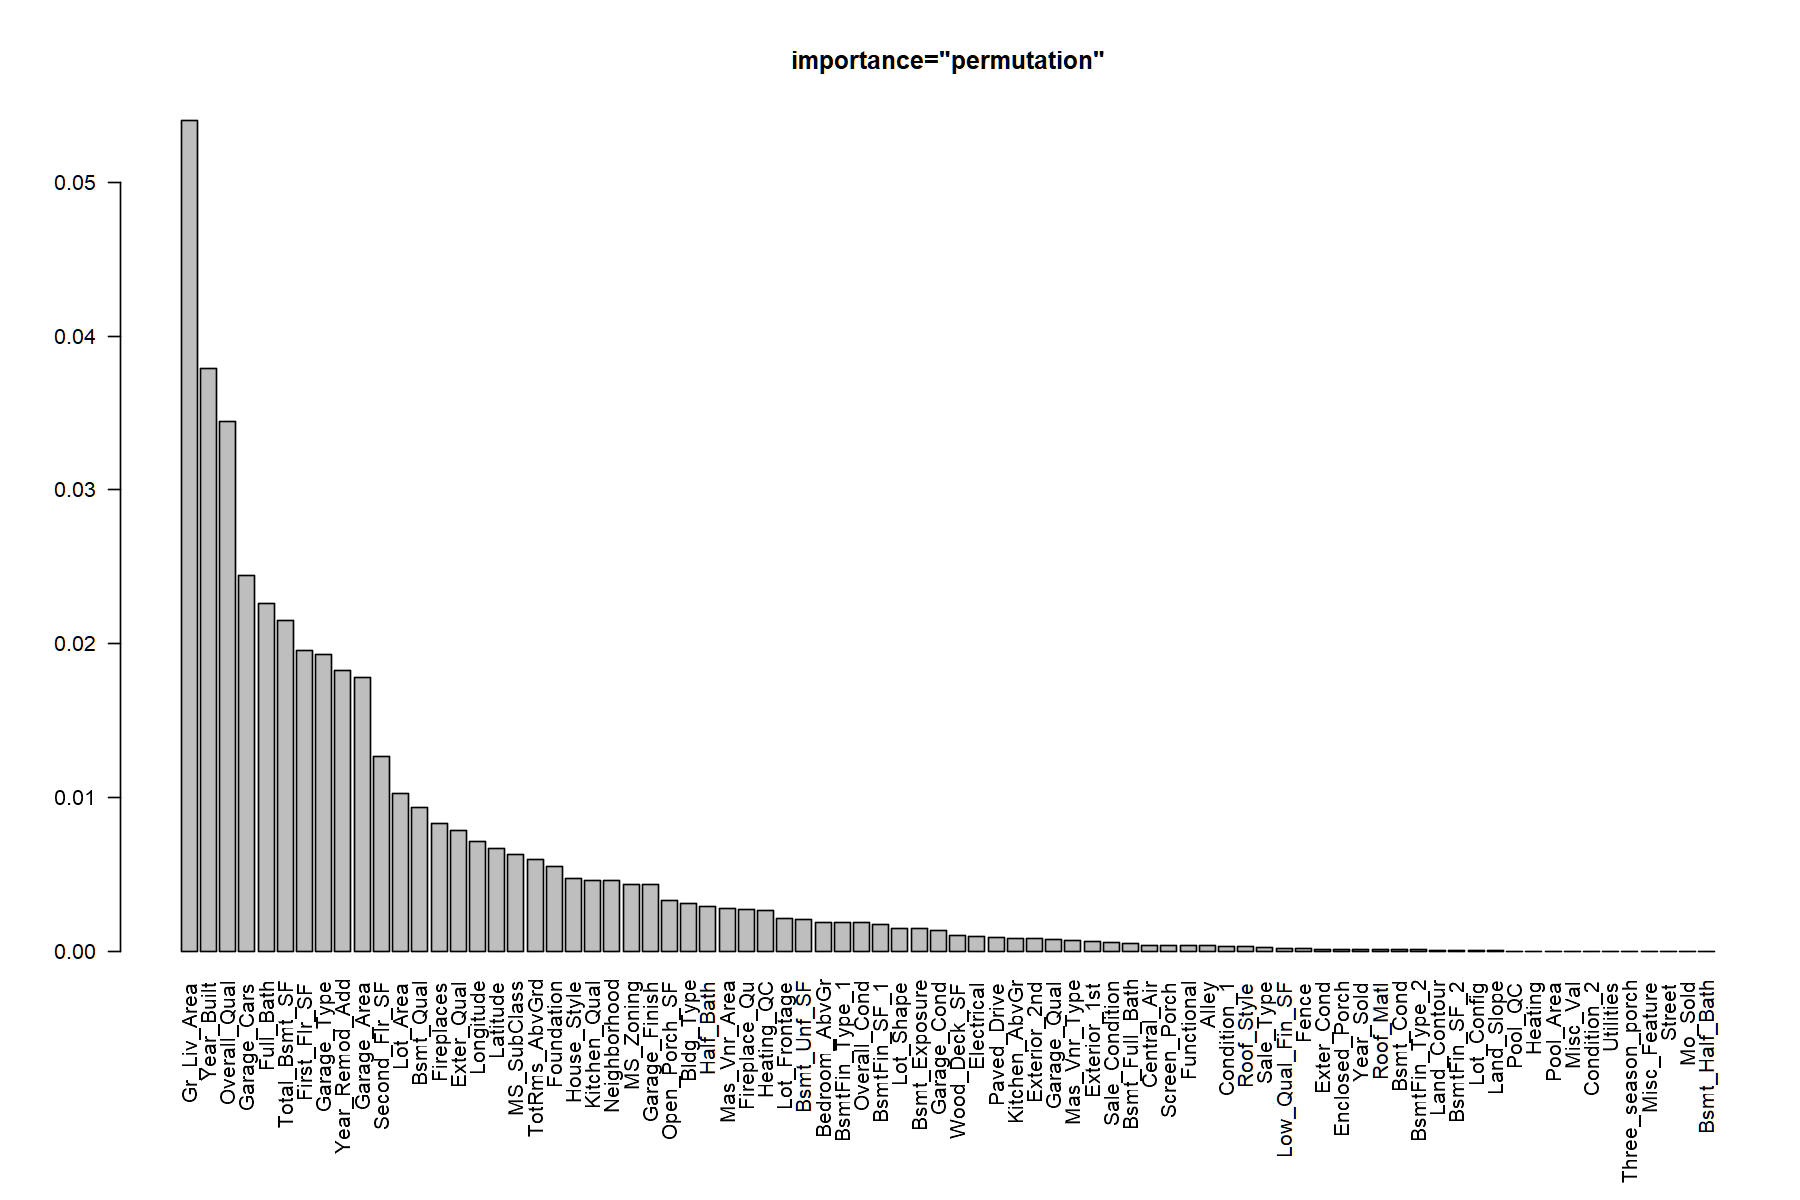

In [39]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, importance="permutation"))
par(mar = c(10,5,5,1))
barplot(sort(importance(rf),decreasing = TRUE), las = 2, main = 'importance="permutation"')

### 参数-num.trees

In [40]:
(rf <- ranger(Sale_Price ~ ., data = ames_c))  #默认num.trees=500

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.93 % 

In [41]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, num.trees = 1000))  

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, num.trees = 1000) 

Type:                             Classification 
Number of trees:                  1000 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

In [ ]:
可见，“树”的多少影响随机森林的性能--树越多，随机森林越准确，但训练越耗时。

### 参数-verbose

In [45]:
(rf <- ranger(Sale_Price ~ ., data = ames_c)) #默认verbose=TRUE

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.00 % 

In [43]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, verbose = FALSE)) #怎么和上一句没有区别?

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, verbose = FALSE) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.89 % 

### 参数-max.depth

In [45]:
(rf <- ranger(Sale_Price ~ ., data = ames_c)) #默认max.depth=NULL

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.00 % 

In [46]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, max.depth = 1)) 

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, max.depth = 1) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             11.50 % 

In [70]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, max.depth = 3)) 

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, max.depth = 3) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             9.49 % 

In [ ]:
可见，max.depth影响随机森林的性能，但引入max.depth参数会增加超参数。

### 参数-seed

In [50]:
(rf <- ranger(Sale_Price ~ ., data = ames_c)) #默认seed=NULL--重复执行,结果不相同

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.06 % 

In [53]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, seed = 111)) #重复执行,结果相同

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

可见，seed参数起到“固化”结果的作用。

### 参数-holdout

具体的作用不明

In [4]:
(rf <- ranger(Sale_Price ~ ., data = ames_c))  #默认holdout=FALSE

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.13 % 

In [9]:
set.seed(111)
cw <- sample(c(0, 1), nrow(ames_c), replace = TRUE)
(rf <- ranger(Sale_Price ~ ., data = ames_c, case.weights = cw, holdout = TRUE)) 

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, case.weights = cw, holdout = TRUE) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.64 % 

In [10]:
rf$confusion.matrix  #可见只有一半左右的样例用于训练

       predicted
true    FALSE TRUE <NA>
  FALSE   704   34  729
  TRUE     64  674  725

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, case.weights = cw, holdout = TRUE,      importance = "impurity", seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             7.85 % 

[1] 0.0785124

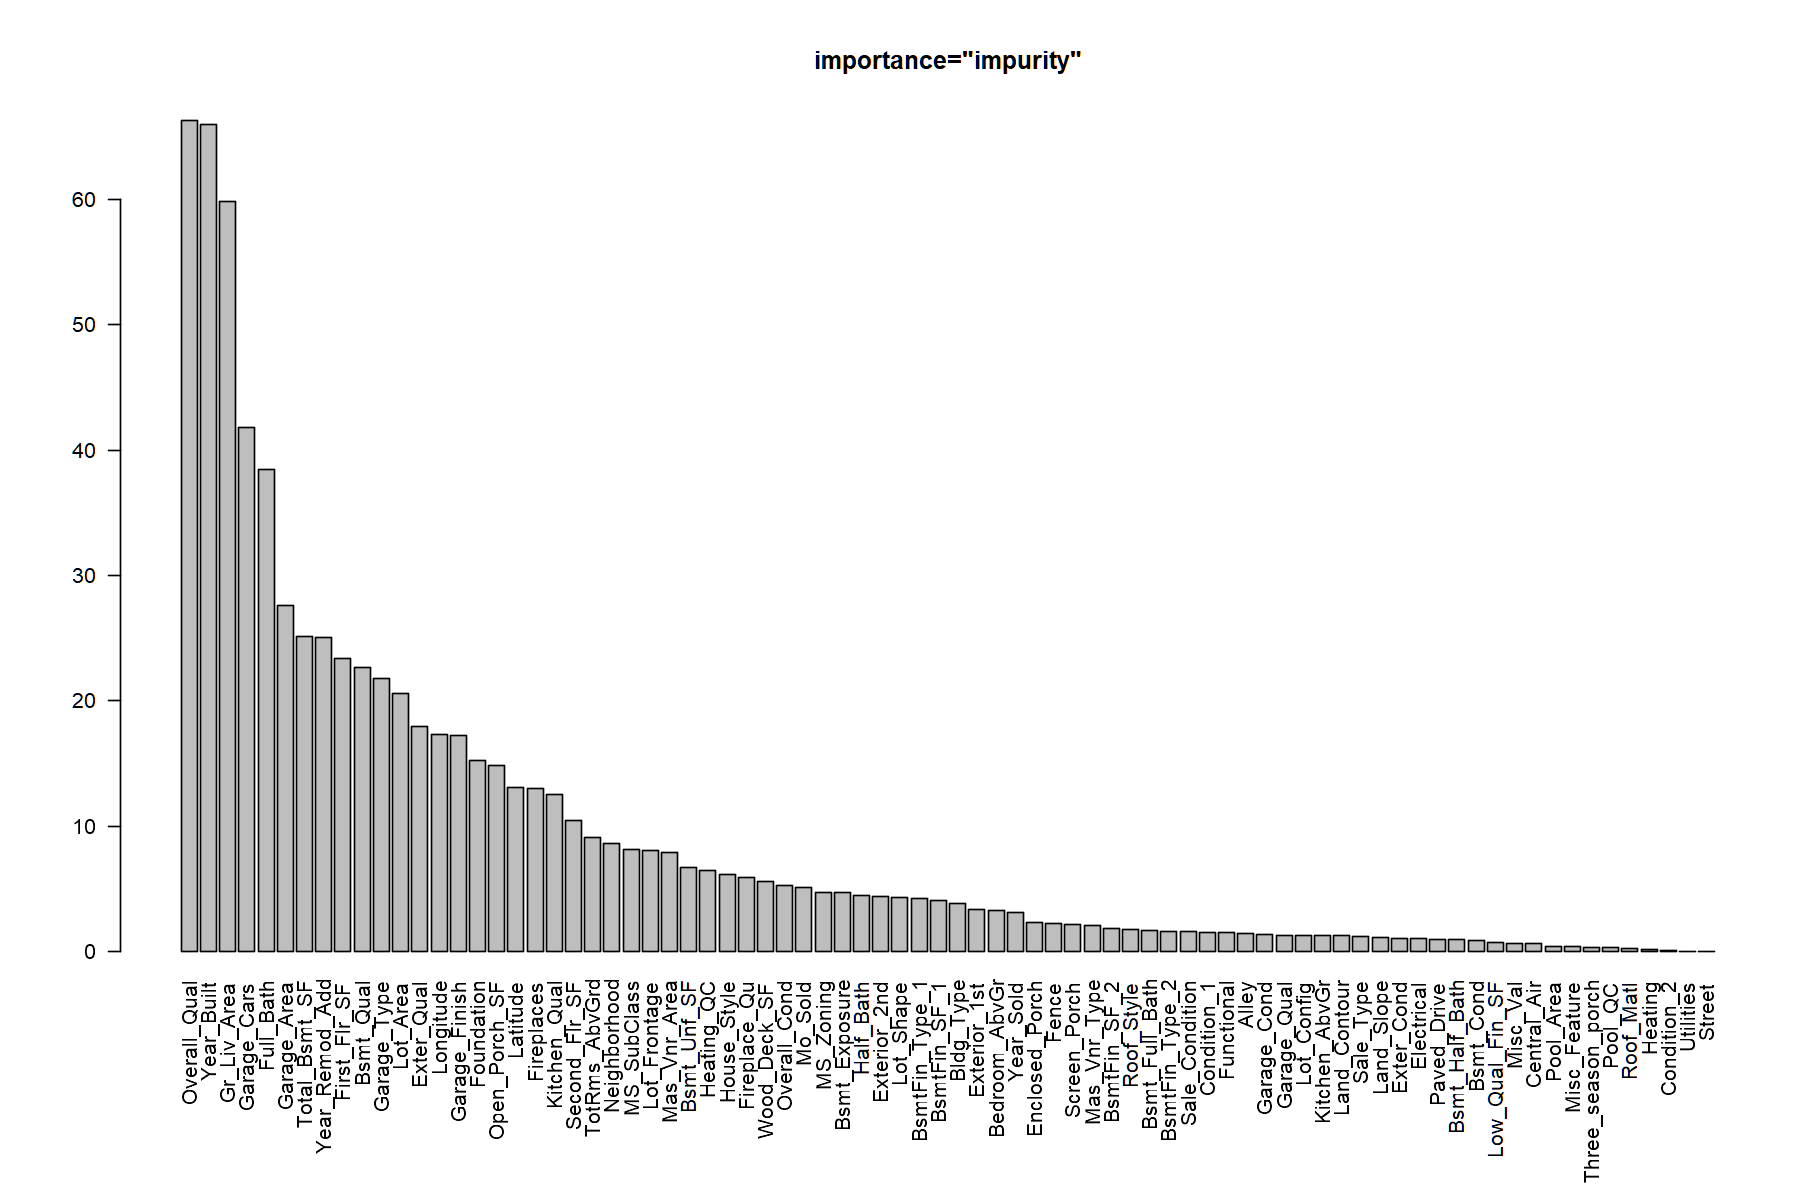

In [33]:
set.seed(222)
cw <- sample(c(0, 1), nrow(ames_c), replace = TRUE)
# Hold-out mode:Hold-out all samples with case weight 0 and 
# use these for variable importance and prediction error.
(rf <- ranger(Sale_Price ~ ., data = ames_c, case.weights = cw, holdout = TRUE, 
              importance="impurity", seed = 111))
par(mar = c(10,5,5,1))
barplot(sort(importance(rf),decreasing = TRUE), las = 2, main = 'importance="impurity"')


In [ ]:
与下例(非Hold-out mode)比较，发现“OOB prediction error”和importance排序有变。

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, importance = "impurity",      seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

[1] 0.06791809

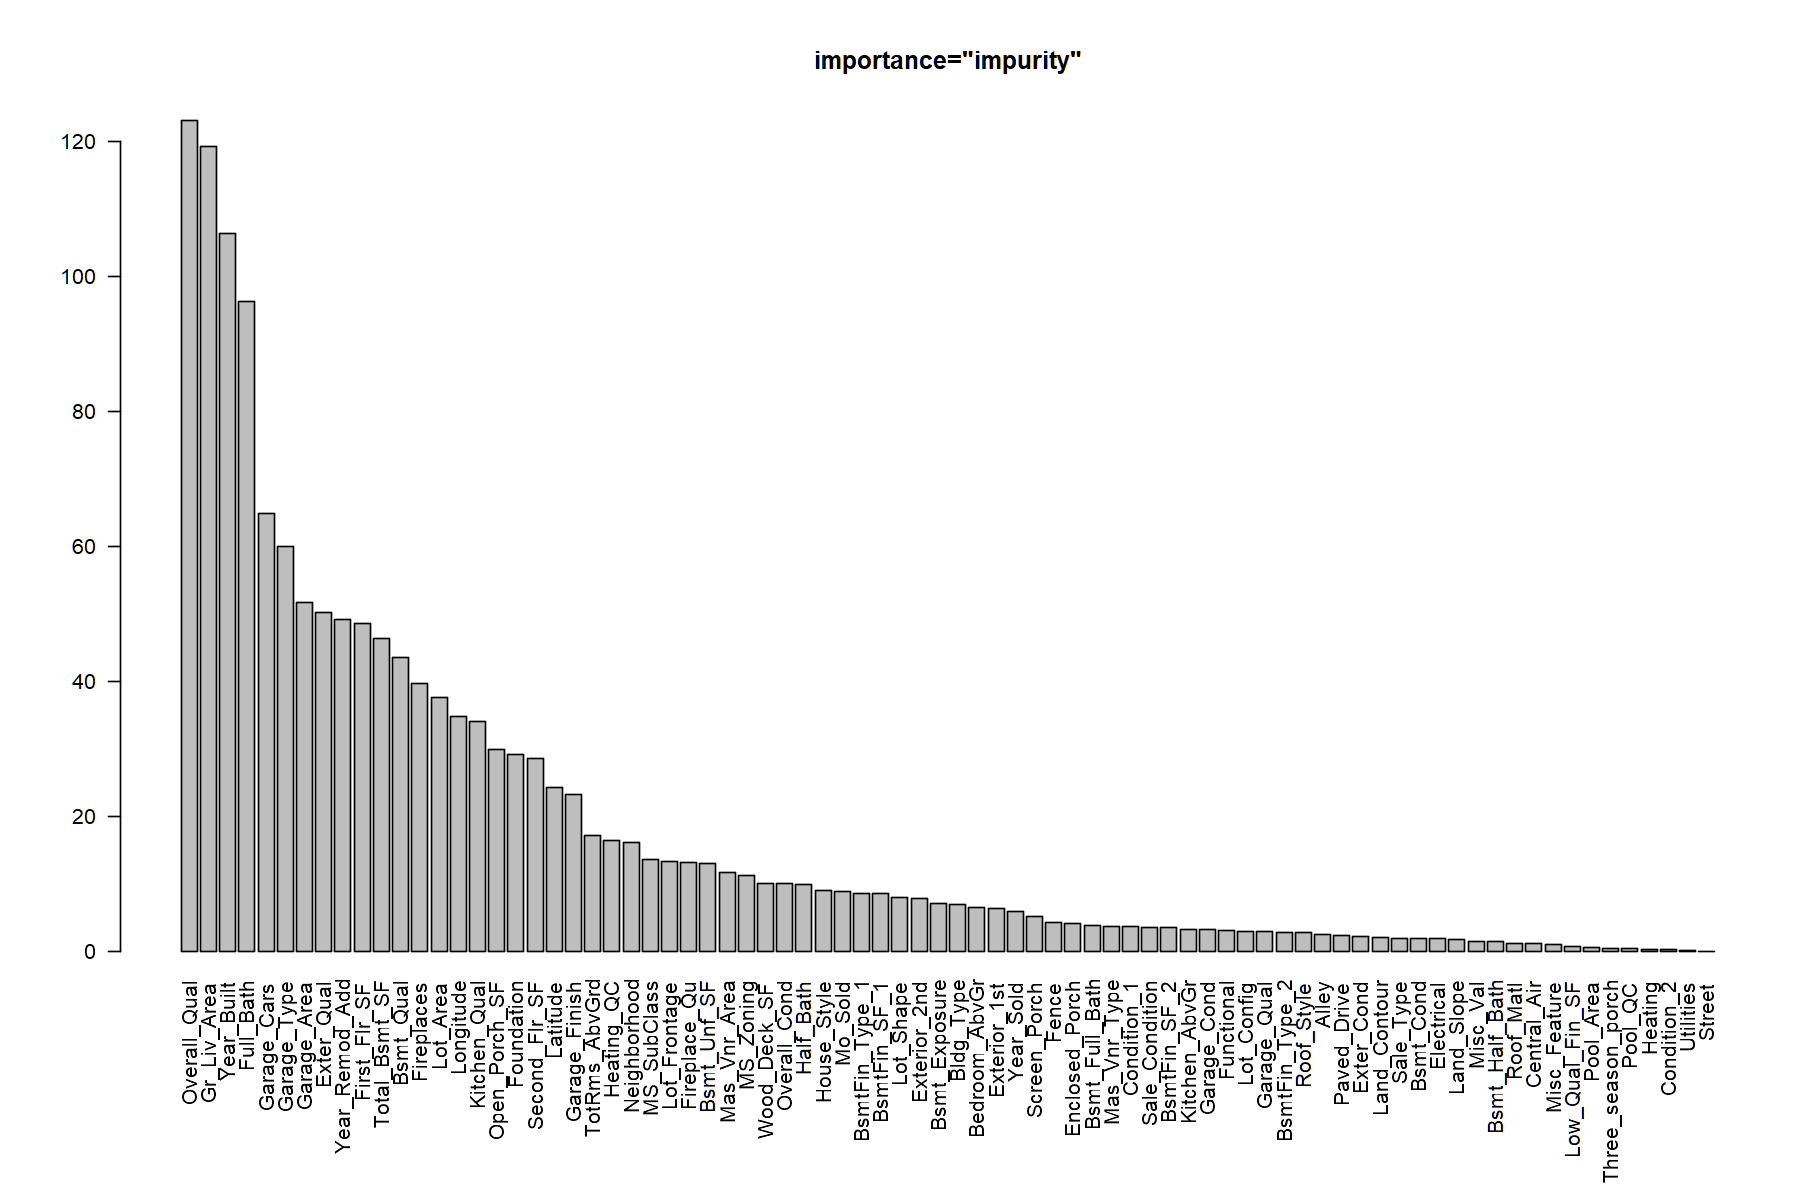

In [34]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, importance="impurity", seed = 111))
par(mar = c(10,5,5,1))
barplot(sort(importance(rf),decreasing = TRUE), las = 2, main = 'importance="impurity"')


In [14]:
rf$prediction.error

[1] 0.06639566

### 参数(分类)-class.weights

In [41]:
(rf1 <- ranger(Sale_Price ~ ., data = ames_c, class.weights = c(1,100), seed = 111))  #默认probability = FALSE
rf1$confusion.matrix
(rf2 <- ranger(Sale_Price ~ ., data = ames_c, seed = 111)) 
rf2$confusion.matrix

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, class.weights = c(1, 100),      seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.76 % 

       predicted
true    FALSE TRUE
  FALSE  1386   81
  TRUE    117 1346

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, seed = 111) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             6.79 % 

       predicted
true    FALSE TRUE
  FALSE  1387   80
  TRUE    119 1344

### 参数(分类)-probability

In [61]:
(rf <- ranger(Sale_Price ~ ., data = ames_c))  #默认probability = FALSE
rf$predictions

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.03 % 

[1] TRUE  FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE 
  [23] TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [45] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [67] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  FALSE FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
  [89] FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [111] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE TRUE  FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [133] TRUE  FALSE FALSE FALSE TRUE  TRUE  FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [155] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [177] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [199] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [221] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE TRUE  TRUE  TRUE  FALSE FALSE TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE 
 [243] FALSE FALSE TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE FALSE TRUE  TRUE  FALSE FALSE FALSE FALSE TRUE 
 [265] TRUE  TRUE  TRUE  TRUE  FALSE FALSE TRUE  TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [287] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [309] TRUE  TRUE  TRUE  TRUE  FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE
 [331] FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [353] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [375] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [419] FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [441] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [463] TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [485] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [507] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [529] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE TRUE  TRUE  TRUE  FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE 
 [551] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
 [573] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  FALSE
 [595] FALSE FALSE TRUE  TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE TRUE  TRUE  FALSE TRUE  FALSE FALSE FALSE
 [617] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE TRUE  TRUE  FA

In [21]:
rf <- ranger(Species ~ ., data = iris, probability = TRUE)  
rf$predictions

setosa,versicolor,virginica
1.0000000,0.000000000,0
0.9980159,0.001984127,0
1.0000000,0.000000000,0
1.0000000,0.000000000,0
1.0000000,0.000000000,0
1.0000000,0.000000000,0
1.0000000,0.000000000,0
1.0000000,0.000000000,0
0.9979675,0.002032520,0
1.0000000,0.000000000,0


### 参数(分类)-splitrule

In [25]:
(rf <- ranger(Sale_Price ~ ., data = ames_c)) #默认splitrule= "gini"

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             7.06 % 

In [27]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, splitrule = "hellinger")) 
#splitrule = "hellinger"只适用于二分类问题

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, splitrule = "hellinger") 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        hellinger 
OOB prediction error:             7.10 % 

In [60]:
(rf <- ranger(Sale_Price ~ ., data = ames_c, splitrule = "extratrees")) 
#splitrule = "hellinger"只适用于二分类问题

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames_c, splitrule = "extratrees") 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        extratrees 
Number of random splits:          1 
OOB prediction error:             7.47 % 

### 参数(回归)-splitrule

In [56]:
ames <- as.data.frame(AmesHousing::make_ames())
(rf <- ranger(Sale_Price ~ ., data = ames)) #默认splitrule="variance"

In [58]:
(rf <- ranger(Sale_Price ~ ., data = ames, splitrule= "extratrees")) 

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames, splitrule = "extratrees") 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        extratrees 
Number of random splits:          1 
OOB prediction error (MSE):       763892403 
R squared (OOB):                  0.880303 

In [59]:
(rf <- ranger(Sale_Price ~ ., data = ames, splitrule= "maxstat"))   #splitrule="beta"等效

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames, splitrule = "maxstat") 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        maxstat 
OOB prediction error (MSE):       885003425 
R squared (OOB):                  0.8613257 

### 参数(回归)-quantreg

In [63]:
ames <- as.data.frame(AmesHousing::make_ames())
(rf <- ranger(Sale_Price ~ ., data = ames, quantreg = TRUE))

Ranger result

Call:
 ranger(Sale_Price ~ ., data = ames, quantreg = TRUE) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      2930 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       617590659 
R squared (OOB):                  0.9032275 